# <center> How do Big Cities Differ from Each Other? </center>

## <center> Analysis of big tourist cities to determine their characteristics </center>

###  <center> Capstone project for IBM Data Science Professional certificate on Coursera.org, By Sophie Tanny </center>
***

### Various downloads and installs

In [ ]:
!conda update -n base -c defaults conda

In [ ]:
!conda install -c conda-forge requests --yes

In [ ]:
!conda install -c conda-forge folium=0.5.0 --yes 

In [67]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt 

# import k-means from clustering stage
from sklearn.cluster import KMeans

# import folium for map displays
import folium 

print('Libraries imported.')

Libraries imported.


### Creating the list of cities to cluster

In [68]:
citylist = ['Paris, France', 
            'Rome, Italy', 
            'New York, United States', 
            'Barcelona, Spain', 
            'Florence, Italy', 
            'Venice, Italy', 
            'Amsterdam, Netherlands', 
            'Sydney, Australia', 
            'Cape Town, South Africa', 
            'Lisbon, Portugal', 
            'Berlin, Germany', 
            'Bangkok, Thailand', 
            'San Francisco, United States', 
            'Melbourne, Australia', 
            'Hong Kong, Hong Kong', 
            'København, Denmark', 
            'Tokyo, Japan', 
            'Vancouver, Canada', 
            'Vienna, Austria', 
            'St Petersburg, Russia', 
            'Dubai, United Arab Emirates', 
            'Madrid, Spain', 
            'Dublin, Ireland', 
            'Chicago, United States', 
            'Los Angeles, United States', 
            'Toronto, Canada', 
            'Tel Aviv-Yafo, Israel', 
            'London, United Kingdom', 
            'Edinburgh, Scotland', 
            'Bristol, United Kingdom', 
            'Glasgow, United Kingdom', 
            'Athens, Greece', 
            'Istanbul, Turkey', 
            'Moscow, Russia', 
            'Brussels, Belgium', 
            'Warsaw, Poland', 
            'Kraków, Poland', 
            'Budapest, Hungary', 
            'Prague, Czechia', 
            'Bucharest, Romania', 
            'Larnaka, Cyprus', 
            'Johannesburg, South Africa', 
            'Cairo, Egypt', 
            'Lagos, Nigeria', 
            'Kuala Lumpur, Malaysia', 
            'Seoul, South Korea', 
            'Singapore, Singapore', 
            'Phuket, Thailand', 
            'Antalya, Turkey', 
            'Osaka, Japan', 
            'Macau, Macau', 
            'Mumbai, India', 
            'Guangzhou, China', 
            'Taipei, Taiwan', 
            'Delhi, India', 
            'Shenzhen, China', 
            'Beijing, China', 
            'Rio de Janeiro, Brazil'
]

In [69]:
citylist

['Paris, France',
 'Rome, Italy',
 'New York, United States',
 'Barcelona, Spain',
 'Florence, Italy',
 'Venice, Italy',
 'Amsterdam, Netherlands',
 'Sydney, Australia',
 'Cape Town, South Africa',
 'Lisbon, Portugal',
 'Berlin, Germany',
 'Bangkok, Thailand',
 'San Francisco, United States',
 'Melbourne, Australia',
 'Hong Kong, Hong Kong',
 'København, Denmark',
 'Tokyo, Japan',
 'Vancouver, Canada',
 'Vienna, Austria',
 'St Petersburg, Russia',
 'Dubai, United Arab Emirates',
 'Madrid, Spain',
 'Dublin, Ireland',
 'Chicago, United States',
 'Los Angeles, United States',
 'Toronto, Canada',
 'Tel Aviv-Yafo, Israel',
 'London, United Kingdom',
 'Edinburgh, Scotland',
 'Bristol, United Kingdom',
 'Glasgow, United Kingdom',
 'Athens, Greece',
 'Istanbul, Turkey',
 'Moscow, Russia',
 'Brussels, Belgium',
 'Warsaw, Poland',
 'Kraków, Poland',
 'Budapest, Hungary',
 'Prague, Czechia',
 'Bucharest, Romania',
 'Larnaka, Cyprus',
 'Johannesburg, South Africa',
 'Cairo, Egypt',
 'Lagos, Nigeri

### Turn into a dataframe
Because some of the big cities have namesakes in other countries, I concatenated the city and the country to a single column (originally entered so on the list above), and later on I  do the same thing on the geodata file, so they can be compared

In [70]:
citydata = pd.DataFrame({'full':citylist})

In [71]:
citydata.head()

,full
0,"Paris, France"
1,"Rome, Italy"
2,"New York, United States"
3,"Barcelona, Spain"
4,"Florence, Italy"


### Importing the geodata file from <https://simplemaps.com/data/world-cities>

In [72]:
coords = pd.read_csv("Documents\Data Science Courses\world cities\worldcities.csv")

In [73]:
coords.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Malishevë,Malisheve,42.4822,20.7458,Kosovo,XK,XKS,Malishevë,admin,NaN,1901597212
1,Prizren,Prizren,42.2139,20.7397,Kosovo,XK,XKS,Prizren,admin,NaN,1901360309
2,Zubin Potok,Zubin Potok,42.9144,20.6897,Kosovo,XK,XKS,Zubin Potok,admin,NaN,1901608808
3,Kamenicë,Kamenice,42.5781,21.5803,Kosovo,XK,XKS,Kamenicë,admin,NaN,1901851592
4,Viti,Viti,42.3214,21.3583,Kosovo,XK,XKS,Viti,admin,NaN,1901328795


### Clean the data from unnecessary columns and create a concatenated column named "full"

In [74]:
coords.drop(['city_ascii', 'iso2', 'iso3', 'admin_name', 'capital', 'population', 'id'], axis=1, inplace=True)

In [75]:
coords.head()

,city,lat,lng,country
0,Malishevë,42.4822,20.7458,Kosovo
1,Prizren,42.2139,20.7397,Kosovo
2,Zubin Potok,42.9144,20.6897,Kosovo
3,Kamenicë,42.5781,21.5803,Kosovo
4,Viti,42.3214,21.3583,Kosovo


In [76]:
coords['full'] = coords['city'].str.cat(coords['country'],sep=", ")

In [77]:
coords.head()

,city,lat,lng,country,full
0,Malishevë,42.4822,20.7458,Kosovo,"Malishevë, Kosovo"
1,Prizren,42.2139,20.7397,Kosovo,"Prizren, Kosovo"
2,Zubin Potok,42.9144,20.6897,Kosovo,"Zubin Potok, Kosovo"
3,Kamenicë,42.5781,21.5803,Kosovo,"Kamenicë, Kosovo"
4,Viti,42.3214,21.3583,Kosovo,"Viti, Kosovo"


### Merge citydata with coords to achieve the coordinates for the list of cities I want to investigate

In [78]:
citydata = citydata.merge(coords, on='full') 

In [80]:
citydata.head()

,full,city,lat,lng,country
0,"Paris, France",Paris,48.8667,2.3333,France
1,"Rome, Italy",Rome,41.8960,12.4833,Italy
2,"New York, United States",New York,40.6943,-73.9249,United States
3,"Barcelona, Spain",Barcelona,41.3833,2.1834,Spain
4,"Florence, Italy",Florence,43.7800,11.2500,Italy


In [81]:
citydata.count()

full       54
city       54
lat        54
lng        54
country    54
dtype: int64

### Showing all cities on the world map

In [117]:
# create map of the world using latitude and longitude values
map_world = folium.Map()

# add markers to map
for lat, lng, city in zip(citydata['lat'], citydata['lng'], citydata['city']):
    label = '{}'.format(city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_world)  
    
map_world

### Access Foursquare and explore popular venues

#### (FourSquare login data is a hidden cell)

In [83]:
@hidden_cell
CLIENT_ID = 'JTWSXJDBW5GRT1QYD3IAG24TOA4W1BHCHAI004RXAKP4OGDG' # your Foursquare ID
CLIENT_SECRET = 'BBSDE2DT1OLWGFZT2BMLX2IIHSEAKY1CSLBGKBA3SJVI3KOX' # your Foursquare Secret
VERSION = '20180602' # Foursquare API version


In [84]:
def getNearbyVenues(names, latitudes, longitudes, radius=10000, LIMIT=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [85]:
cities_venues = getNearbyVenues(names=citydata['city'],
                                   latitudes=citydata['lat'],
                                   longitudes=citydata['lng']
                                  )


Paris
Rome
New York
Barcelona
Florence
Venice
Amsterdam
Sydney
Cape Town
Lisbon
Berlin
Bangkok
San Francisco
Melbourne
Hong Kong
København
Tokyo
Vancouver
Vienna
Dubai
Madrid
Dublin
Chicago
Los Angeles
Toronto
Tel Aviv-Yafo
London
Bristol
Glasgow
Athens
Istanbul
Moscow
Brussels
Warsaw
Kraków
Budapest
Prague
Bucharest
Larnaka
Johannesburg
Cairo
Lagos
Kuala Lumpur
Singapore
Phuket
Antalya
Macau
Mumbai
Guangzhou
Taipei
Delhi
Shenzhen
Beijing
Rio de Janeiro


In [86]:
print(cities_venues.shape)
cities_venues.head()

(5400, 7)


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Paris,48.8667,2.3333,Sanukiya,48.864713,2.334059,Udon Restaurant
1,Paris,48.8667,2.3333,Place Vendôme,48.867798,2.329741,Plaza
2,Paris,48.8667,2.3333,Pierre Hermé,48.868222,2.333397,Pastry Shop
3,Paris,48.8667,2.3333,Park Hyatt Paris-Vendome,48.868895,2.330232,Hotel
4,Paris,48.8667,2.3333,Jardin du Palais Royal,48.864941,2.337728,Garden


In [87]:
cities_venues.groupby('City').count()

,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
Amsterdam,100,100,100,100,100,100
Antalya,100,100,100,100,100,100
Athens,100,100,100,100,100,100
Bangkok,100,100,100,100,100,100
Barcelona,100,100,100,100,100,100
Beijing,100,100,100,100,100,100
Berlin,100,100,100,100,100,100
Bristol,100,100,100,100,100,100
Brussels,100,100,100,100,100,100


In [88]:
print('There are {} uniques categories.'.format(len(cities_venues['Venue Category'].unique())))

There are 381 uniques categories.


### Preparing the data for KMeans clustering

In [89]:
# one hot encoding
cities_onehot = pd.get_dummies(cities_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
cities_onehot['City'] = cities_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [cities_onehot.columns[-1]] + list(cities_onehot.columns[:-1])
cities_onehot = cities_onehot[fixed_columns]

cities_onehot.head()

,City,Accessories Store,Adult Boutique,African Restaurant,Airport Lounge,Airport Service,American Restaurant,Amphitheater,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Stadium,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Beijing Restaurant,Belgian Restaurant,Bike Rental / Bike Share,Bistro,Board Shop,Bookstore,Borek Place,Botanical Garden,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buddhist Temple,Buffet,Building,Burger Joint,Burrito Place,Butcher,Café,Camera Store,Canal,Candy Store,Cantonese Restaurant,Capitol Building,Casino,Castle,Caucasian Restaurant,Cha Chaan Teng,Cheese Shop,Chinese Breakfast Place,Chinese Restaurant,Chocolate Shop,Church,Circus,City Hall,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Arts Building,College Library,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Corsican Restaurant,Cosmetics Shop,Creperie,Cricket Ground,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Distillery,Dive Bar,Dive Spot,Dog Run,Donburi Restaurant,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Fish Taverna,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hainan Restaurant,Harbor / Marina,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Hill,Hindu Temple,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Hunan Restaurant,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Irani Cafe,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kafenio,Kaiseki Restaurant,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Kuruyemişçi,Lake,Latin American Restaurant,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Macanese Restaurant,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Meze Restaurant,Middle Eastern Restaurant,Military Base,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Modern Greek Restaurant,Molecular Gastronomy Restaurant,Monastery,Monument / Landmark,Moroccan Restaurant,Mosque,Motel,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Night Market,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoor Event Space,Outdoor Sculpture,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Peking Duck Restaurant,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Café,Pet Service,Photography Lab,Photography Studio,Pie Shop,Pier,Pizza Place,Planetarium,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Public Art,Racecourse,Radio Station,Ramen Restaurant,Record Shop,Rental Car Location,Reservoir,Resort,Rest Area,Restaurant,Road,Rock Climbing Spot,Rock Club,Roller Rink,Roman Restaurant,R

In [90]:
cities_onehot.shape

(5400, 382)

In [91]:
cities_grouped = cities_onehot.groupby('City').mean().reset_index()
cities_grouped

,City,Accessories Store,Adult Boutique,African Restaurant,Airport Lounge,Airport Service,American Restaurant,Amphitheater,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Stadium,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Beijing Restaurant,Belgian Restaurant,Bike Rental / Bike Share,Bistro,Board Shop,Bookstore,Borek Place,Botanical Garden,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buddhist Temple,Buffet,Building,Burger Joint,Burrito Place,Butcher,Café,Camera Store,Canal,Candy Store,Cantonese Restaurant,Capitol Building,Casino,Castle,Caucasian Restaurant,Cha Chaan Teng,Cheese Shop,Chinese Breakfast Place,Chinese Restaurant,Chocolate Shop,Church,Circus,City Hall,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Arts Building,College Library,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Corsican Restaurant,Cosmetics Shop,Creperie,Cricket Ground,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Distillery,Dive Bar,Dive Spot,Dog Run,Donburi Restaurant,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Fish Taverna,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hainan Restaurant,Harbor / Marina,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Hill,Hindu Temple,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Hunan Restaurant,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Irani Cafe,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kafenio,Kaiseki Restaurant,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Kuruyemişçi,Lake,Latin American Restaurant,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Macanese Restaurant,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Meze Restaurant,Middle Eastern Restaurant,Military Base,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Modern Greek Restaurant,Molecular Gastronomy Restaurant,Monastery,Monument / Landmark,Moroccan Restaurant,Mosque,Motel,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Night Market,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoor Event Space,Outdoor Sculpture,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Peking Duck Restaurant,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Café,Pet Service,Photography Lab,Photography Studio,Pie Shop,Pier,Pizza Place,Planetarium,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Public Art,Racecourse,Radio Station,Ramen Restaurant,Record Shop,Rental Car Location,Reservoir,Resort,Rest Area,Restaurant,Road,Rock Climbing Spot,Rock Club,Roller Rink,Roman Restaurant,R

In [92]:
cities_grouped.shape

(54, 382)

In [93]:
num_top_venues = 5

for City in cities_grouped['City']:
    print("----"+City+"----")
    temp = cities_grouped[cities_grouped['City'] == City].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Amsterdam----
            venue  freq
0           Hotel  0.09
1            Park  0.06
2  Breakfast Spot  0.05
3             Bar  0.04
4     Coffee Shop  0.04


----Antalya----
         venue  freq
0  Coffee Shop  0.05
1         Café  0.05
2         Park  0.04
3   Restaurant  0.04
4    Bookstore  0.03


----Athens----
           venue  freq
0  Historic Site  0.10
1    Coffee Shop  0.08
2            Bar  0.07
3           Café  0.05
4       Wine Bar  0.04


----Bangkok----
             venue  freq
0            Hotel  0.13
1      Coffee Shop  0.07
2    Shopping Mall  0.05
3  Thai Restaurant  0.05
4     Dessert Shop  0.04


----Barcelona----
                venue  freq
0    Tapas Restaurant  0.09
1               Hotel  0.09
2  Spanish Restaurant  0.07
3         Coffee Shop  0.05
4               Plaza  0.05


----Beijing----
                venue  freq
0       Historic Site  0.18
1               Hotel  0.11
2                Park  0.05
3                Café  0.05
4  Chinese Restaurant  0.

                venue  freq
0               Hotel  0.09
1         Coffee Shop  0.06
2              Bakery  0.05
3  Seafood Restaurant  0.05
4                Park  0.04


----Venice----
                venue  freq
0  Italian Restaurant  0.16
1               Hotel  0.14
2               Plaza  0.08
3      Ice Cream Shop  0.07
4            Wine Bar  0.04


----Vienna----
                 venue  freq
0                Hotel  0.10
1                Plaza  0.08
2  Austrian Restaurant  0.06
3                 Café  0.05
4       Ice Cream Shop  0.05


----Warsaw----
              venue  freq
0             Plaza  0.06
1              Café  0.06
2       Coffee Shop  0.05
3            Bakery  0.04
4  Sushi Restaurant  0.04




In [94]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [95]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
cities_venues_sorted = pd.DataFrame(columns=columns)
cities_venues_sorted['City'] = cities_grouped['City']

for ind in np.arange(cities_grouped.shape[0]):
    cities_venues_sorted.iloc[ind, 1:] = return_most_common_venues(cities_grouped.iloc[ind, :], num_top_venues)

cities_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amsterdam,Hotel,Park,Breakfast Spot,Ice Cream Shop,French Restaurant,Bar,Coffee Shop,Restaurant,Bakery,Café
1,Antalya,Café,Coffee Shop,Restaurant,Park,Bookstore,Historic Site,Museum,Seafood Restaurant,Bar,Burger Joint
2,Athens,Historic Site,Coffee Shop,Bar,Café,Greek Restaurant,Wine Bar,Cocktail Bar,Bookstore,Meze Restaurant,History Museum
3,Bangkok,Hotel,Coffee Shop,Shopping Mall,Thai Restaurant,Dessert Shop,Asian Restaurant,Noodle House,Massage Studio,Bookstore,Palace
4,Barcelona,Hotel,Tapas Restaurant,Spanish Restaurant,Coffee Shop,Plaza,Burger Joint,Wine Bar,Cocktail Bar,Ice Cream Shop,Bookstore


### Determining the optimal K value for clustering 

In [96]:
cities_fit = cities_grouped
cities_fit.drop(['City'], axis=1, inplace=True)
cities_fit.head()

,Accessories Store,Adult Boutique,African Restaurant,Airport Lounge,Airport Service,American Restaurant,Amphitheater,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Stadium,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Beijing Restaurant,Belgian Restaurant,Bike Rental / Bike Share,Bistro,Board Shop,Bookstore,Borek Place,Botanical Garden,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buddhist Temple,Buffet,Building,Burger Joint,Burrito Place,Butcher,Café,Camera Store,Canal,Candy Store,Cantonese Restaurant,Capitol Building,Casino,Castle,Caucasian Restaurant,Cha Chaan Teng,Cheese Shop,Chinese Breakfast Place,Chinese Restaurant,Chocolate Shop,Church,Circus,City Hall,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Arts Building,College Library,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Corsican Restaurant,Cosmetics Shop,Creperie,Cricket Ground,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Distillery,Dive Bar,Dive Spot,Dog Run,Donburi Restaurant,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Fish Taverna,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hainan Restaurant,Harbor / Marina,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Hill,Hindu Temple,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Hunan Restaurant,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Irani Cafe,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kafenio,Kaiseki Restaurant,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Kuruyemişçi,Lake,Latin American Restaurant,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Macanese Restaurant,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Meze Restaurant,Middle Eastern Restaurant,Military Base,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Modern Greek Restaurant,Molecular Gastronomy Restaurant,Monastery,Monument / Landmark,Moroccan Restaurant,Mosque,Motel,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Night Market,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoor Event Space,Outdoor Sculpture,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Peking Duck Restaurant,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Café,Pet Service,Photography Lab,Photography Studio,Pie Shop,Pier,Pizza Place,Planetarium,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Public Art,Racecourse,Radio Station,Ramen Restaurant,Record Shop,Rental Car Location,Reservoir,Resort,Rest Area,Restaurant,Road,Rock Climbing Spot,Rock Club,Roller Rink,Roman Restaurant,Romani

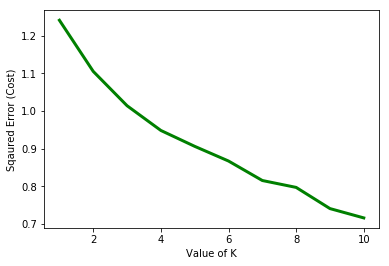

In [97]:


cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(cities_fit) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 
  
# the point of the elbow is the  
# most optimal value for choosing k 

### As shown by the above elbow-test for best K value, the suggested best K is 7. The following analysis will be performed, therefore, on K=7

In [99]:
# set number of clusters
kclusters = 7

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cities_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 1, 1, 2, 4, 5, 1, 1, 1, 0])

In [100]:
# add clustering labels
cities_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

cities_merged = citydata

cities_merged = cities_merged.join(cities_venues_sorted.set_index('City'), on='city')

cities_merged.head()

,full,city,lat,lng,country,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Paris, France",Paris,48.8667,2.3333,France,6,Plaza,Hotel,French Restaurant,Art Museum,Garden,Historic Site,Gourmet Shop,Bookstore,Cocktail Bar,Concert Hall
1,"Rome, Italy",Rome,41.8960,12.4833,Italy,6,Plaza,Historic Site,Ice Cream Shop,Sandwich Place,Monument / Landmark,Italian Restaurant,Church,Art Museum,Fountain,Wine Bar
2,"New York, United States",New York,40.6943,-73.9249,United States,1,Park,Pizza Place,Italian Restaurant,Yoga Studio,Ice Cream Shop,Theater,Indie Movie Theater,Bookstore,Wine Shop,Cocktail Bar
3,"Barcelona, Spain",Barcelona,41.3833,2.1834,Spain,4,Hotel,Tapas Restaurant,Spanish Restaurant,Coffee Shop,Plaza,Burger Joint,Wine Bar,Cocktail Bar,Ice Cream Shop,Bookstore
4,"Florence, Italy",Florence,43.7800,11.2500,Italy,6,Italian Restaurant,Ice Cream Shop,Hotel,Plaza,Sandwich Place,Museum,Art Museum,Trattoria/Osteria,Church,Boutique


### Map display of the seven clusters

In [118]:
# create map
map_clusters = folium.Map(location=[lat, lng], zoom_start=0)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cities_merged['lat'], cities_merged['lng'], cities_merged['city'], cities_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### View most common venues in each cluster separately


In [110]:
cities_merged.loc[cities_merged['Cluster Labels'] == 0, cities_merged.columns[[1] + list(range(5, cities_merged.shape[1]))]]

,city,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Cape Town,0,Hotel,Coffee Shop,Café,Indian Restaurant,Gym,Bakery,Cocktail Bar,Italian Restaurant,Restaurant,Burger Joint
21,Dublin,0,Café,Coffee Shop,Pub,Park,Restaurant,Burger Joint,Plaza,Pizza Place,Indian Restaurant,Ice Cream Shop
28,Glasgow,0,Bar,Coffee Shop,Restaurant,Hotel,Café,Seafood Restaurant,Cocktail Bar,Steakhouse,Whisky Bar,Beer Bar
35,Budapest,0,Coffee Shop,Theater,Pizza Place,Ice Cream Shop,Hotel,Restaurant,Park,Bar,Bakery,Burger Joint
37,Bucharest,0,Coffee Shop,Hotel,Tea Room,Dessert Shop,Restaurant,Pizza Place,Pub,Bar,Romanian Restaurant,Theater
38,Larnaka,0,Coffee Shop,Hotel,Greek Restaurant,Bar,Seafood Restaurant,Beach,Café,Supermarket,Fish Taverna,Lounge
39,Johannesburg,0,Coffee Shop,Hotel,Café,African Restaurant,Pizza Place,Restaurant,Steakhouse,Art Gallery,Park,Italian Restaurant


In [111]:
cities_merged.loc[cities_merged['Cluster Labels'] == 1, cities_merged.columns[[1] + list(range(5, cities_merged.shape[1]))]]

,city,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,New York,1,Park,Pizza Place,Italian Restaurant,Yoga Studio,Ice Cream Shop,Theater,Indie Movie Theater,Bookstore,Wine Shop,Cocktail Bar
7,Sydney,1,Café,Coffee Shop,Bakery,Bar,Ice Cream Shop,Brewery,Thai Restaurant,Restaurant,Pub,Whisky Bar
10,Berlin,1,Coffee Shop,Bookstore,Concert Hall,Park,Gourmet Shop,Café,Sandwich Place,Vegetarian / Vegan Restaurant,Ice Cream Shop,Bakery
12,San Francisco,1,Park,Ice Cream Shop,Coffee Shop,Bakery,Pizza Place,Yoga Studio,Bookstore,Grocery Store,Scenic Lookout,New American Restaurant
13,Melbourne,1,Café,Cocktail Bar,Coffee Shop,Park,Australian Restaurant,Theater,Italian Restaurant,Wine Bar,Plaza,Music Venue
15,København,1,Beer Bar,Café,Scandinavian Restaurant,Cocktail Bar,Coffee Shop,Wine Bar,Sandwich Place,Movie Theater,Park,Art Museum
22,Chicago,1,Coffee Shop,Theater,Brewery,Italian Restaurant,New American Restaurant,Deli / Bodega,Hotel,Bar,Japanese Restaurant,Park
24,Toronto,1,Café,Italian Restaurant,Bar,Park,Grocery Store,Asian Restaurant,Japanese Restaurant,Sandwich Place,BBQ Joint,Vegetarian / Vegan Restaurant
25,Tel Aviv-Yafo,1,Beach,Hotel,Café,Bakery,Ice Cream Shop,Bar,Cocktail Bar,Seafood Restaurant,Park,Plaza
27,Bristol,1,Pub,Bar,Café,Coffee Shop,Italian Restaurant,Theater,Music Venue,Cocktail Bar,Park,Pizza Place


In [112]:
cities_merged.loc[cities_merged['Cluster Labels'] == 2, cities_merged.columns[[1] + list(range(5, cities_merged.shape[1]))]]

,city,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Bangkok,2,Hotel,Coffee Shop,Shopping Mall,Thai Restaurant,Dessert Shop,Asian Restaurant,Noodle House,Massage Studio,Bookstore,Palace
14,Hong Kong,2,Hotel,Park,Chinese Restaurant,Café,Dessert Shop,Japanese Restaurant,Dim Sum Restaurant,Spa,Shopping Mall,Dumpling Restaurant
19,Dubai,2,Hotel,Coffee Shop,Café,Beach,Jewelry Store,Restaurant,Ice Cream Shop,French Restaurant,Middle Eastern Restaurant,American Restaurant
42,Kuala Lumpur,2,Hotel,Café,Chinese Restaurant,Lounge,Shopping Mall,Park,Indian Restaurant,Spa,Malay Restaurant,Japanese Restaurant
46,Macau,2,Hotel,Café,Portuguese Restaurant,Coffee Shop,Chinese Restaurant,Macanese Restaurant,Italian Restaurant,Plaza,Cantonese Restaurant,Bakery
48,Guangzhou,2,Hotel,Coffee Shop,Turkish Restaurant,Shopping Mall,Chinese Restaurant,Park,Nightclub,Cocktail Bar,Bar,Seafood Restaurant
49,Taipei,2,Café,Hotel,Japanese Restaurant,Dumpling Restaurant,Dessert Shop,Noodle House,Bookstore,Bakery,BBQ Joint,Park
51,Shenzhen,2,Hotel,Coffee Shop,Café,Shopping Mall,Chinese Restaurant,Park,Electronics Store,Hotpot Restaurant,Seafood Restaurant,Nightclub


In [113]:
cities_merged.loc[cities_merged['Cluster Labels'] == 3, cities_merged.columns[[1] + list(range(5, cities_merged.shape[1]))]]

,city,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
47,Mumbai,3,Indian Restaurant,Café,Hotel,Scenic Lookout,Bar,Bakery,Dessert Shop,Deli / Bodega,Asian Restaurant,Restaurant
50,Delhi,3,Indian Restaurant,Café,Hotel,Asian Restaurant,Bar,Monument / Landmark,Bakery,Fast Food Restaurant,Restaurant,Market


In [114]:
cities_merged.loc[cities_merged['Cluster Labels'] == 4, cities_merged.columns[[1] + list(range(5, cities_merged.shape[1]))]]

,city,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Barcelona,4,Hotel,Tapas Restaurant,Spanish Restaurant,Coffee Shop,Plaza,Burger Joint,Wine Bar,Cocktail Bar,Ice Cream Shop,Bookstore
6,Amsterdam,4,Hotel,Park,Breakfast Spot,Ice Cream Shop,French Restaurant,Bar,Coffee Shop,Restaurant,Bakery,Café
9,Lisbon,4,Hotel,Portuguese Restaurant,Plaza,Coffee Shop,Garden,Scenic Lookout,Bar,Ice Cream Shop,Lounge,Cocktail Bar
16,Tokyo,4,Hotel,Tonkatsu Restaurant,BBQ Joint,Coffee Shop,Sake Bar,Garden,Wagashi Place,Chinese Restaurant,Sushi Restaurant,Japanese Curry Restaurant
17,Vancouver,4,Hotel,Coffee Shop,Seafood Restaurant,Bakery,Japanese Restaurant,Dessert Shop,Restaurant,Park,Sandwich Place,Trail
18,Vienna,4,Hotel,Plaza,Austrian Restaurant,Ice Cream Shop,Café,Restaurant,Bar,Palace,Concert Hall,Art Museum
20,Madrid,4,Spanish Restaurant,Restaurant,Hotel,Park,Art Museum,Tapas Restaurant,Art Gallery,Plaza,Café,Theater
23,Los Angeles,4,Hotel,American Restaurant,Ice Cream Shop,Sushi Restaurant,Boutique,Park,Coffee Shop,Theme Park Ride / Attraction,Italian Restaurant,Trail
26,London,4,Hotel,Steakhouse,Theater,Art Museum,Coffee Shop,Grocery Store,Plaza,Pizza Place,Scenic Lookout,Indian Restaurant
40,Cairo,4,Hotel,Historic Site,Middle Eastern Restaurant,Café,Lounge,Hotel Bar,Pastry Shop,Performing Arts Venue,Theater,Italian Restaurant


In [115]:
cities_merged.loc[cities_merged['Cluster Labels'] == 5, cities_merged.columns[[1] + list(range(5, cities_merged.shape[1]))]]

,city,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
52,Beijing,5,Historic Site,Hotel,Café,Park,Chinese Restaurant,Bar,Dumpling Restaurant,Yunnan Restaurant,Coffee Shop,Brewery


In [116]:
cities_merged.loc[cities_merged['Cluster Labels'] == 6, cities_merged.columns[[1] + list(range(5, cities_merged.shape[1]))]]

,city,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Paris,6,Plaza,Hotel,French Restaurant,Art Museum,Garden,Historic Site,Gourmet Shop,Bookstore,Cocktail Bar,Concert Hall
1,Rome,6,Plaza,Historic Site,Ice Cream Shop,Sandwich Place,Monument / Landmark,Italian Restaurant,Church,Art Museum,Fountain,Wine Bar
4,Florence,6,Italian Restaurant,Ice Cream Shop,Hotel,Plaza,Sandwich Place,Museum,Art Museum,Trattoria/Osteria,Church,Boutique
5,Venice,6,Italian Restaurant,Hotel,Plaza,Ice Cream Shop,Wine Bar,Winery,Museum,Pizza Place,Church,Historic Site


### End of Notebook